# import libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import easyocr
from PIL import ImageFont, ImageDraw, Image
import arabic_reshaper
from bidi.algorithm import get_display

# predict from image

In [2]:
reader = easyocr.Reader(['ar',])

In [7]:
img_path = "1.png"

result = reader.readtext(img_path)

for r in result: print(r)

[[[1121, 32], [1179, 32], [1179, 62], [1121, 62]], 'معه', 0.8807468784751147]
[[[1179, 11], [1705, 11], [1705, 74], [1179, 74]], 'مقدمة هذا العقد جزا لايتجزأ منه وتقرأ', 0.7317353870780837]
[[[1795, 17], [1837, 17], [1837, 61], [1795, 61]], '(1', 0.9698521010522307]
[[[193, 117], [407, 117], [407, 171], [193, 171]], 'مساحة المكتب', 0.6395876429507075]
[[[415, 149], [515, 149], [515, 161], [415, 161]], 'و', 0.0307587372797693]
[[[416, 116], [480, 116], [480, 146], [416, 146]], '٥', 0.995681547466635]
[[[544, 118], [700, 118], [700, 172], [544, 172]], 'رقم القطعة', 0.616822807494449]
[[[696, 99], [1186, 99], [1186, 176], [696, 176]], 'اجبب»ج  ..  ٠.. دقم الحوض  ر)ءا(', 0.013679743413235069]
[[[1266, 138], [1446, 138], [1446, 150], [1266, 150]], '', 0.0]
[[[1311, 105], [1420, 105], [1420, 147], [1311, 147]], 'ععان', 0.3362049460411072]
[[[1458, 115], [1564, 115], [1564, 157], [1458, 157]], 'المدينة', 0.9968997957938274]
[[[1573, 125], [1587, 125], [1587, 147], [1573, 147]], '.', 0.2869731

معه
مقدمة هذا العقد جزا لايتجزأ منه وتقرأ
(1
مساحة المكتب
و
٥
رقم القطعة
اجبب»ج  ..  ٠.. دقم الحوض  ر)ءا(

ععان
المدينة
.
موقع
(2
باييب
م
_ وكيفية استعماله
جنس
(3
_!بيير
و
.
موقع
(4
لايا (٠ه
ييييربا
..يابج   ب بهماة
م
بدل الإيجار
(5
يبديا 
كيفية دفع البدل
(6
< ٤
جا  ييا  ا
0000
.
تاريخ ابتداء الإيجار
(7
<٠،٥
!،٠٠٧ ييا  ه٠
ييا  يو .
<
رر0رررم
مدة الإيجار
(8
يسلم المؤجر المكتب فارغآ غير مفروش للمستأجر ويحق له احضار الفرش والأجهزة والأدوات والكمبيوتر والشاشة الخاصة به على أن
(9
بإخراجه بنهاية تاريخ عقد الإيجار
تعتبر
المأجود
الحي
المأجود
المأجود
يبياررا
يقوم


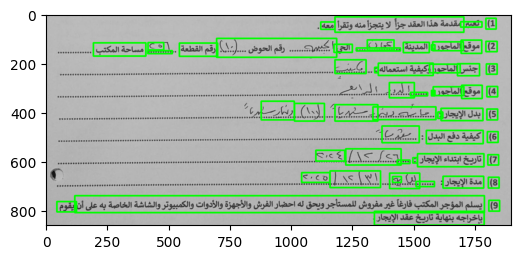

In [8]:
plt.figure(figsize=(6, 6))
img = cv2.imread(img_path)
font = cv2.FONT_HERSHEY_SIMPLEX

for r in result:
    top_left = tuple(map(int, r[0][0]))
    bottom_right = tuple(map(int, r[0][2]))
    text = r[1]
    
    img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 5)
    # img = cv2.putText(img, text, top_left, font, .5, (255, 255, 255), 2, cv2.LINE_AA)

    reshaped_text = arabic_reshaper.reshape(text)
    bidi_text = get_display(reshaped_text)

    img_pil = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(img_pil)

    font = ImageFont.truetype("NotoSansArabic-VariableFont_wdth,wght.ttf", 32)

    # draw.text((top_left[0], top_left[1]), bidi_text, font=font, fill=(255, 0, 0))
    img = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)
    print(text)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()